# K-MEANS CLUSTERING - UNAD TAREA 4

Este notebook realiza un an√°lisis de segmentaci√≥n de clientes utilizando el algoritmo K-means clustering. El objetivo es identificar grupos de clientes con caracter√≠sticas similares basados en sus patrones de compra, edad e ingresos.

## 1. Importaci√≥n de Librer√≠as Necesarias

In [1]:
# Importaci√≥n de librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # ‚úÖ ESTA L√çNEA ES CLAVE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Configuraci√≥n moderna de visualizaci√≥n
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Configuraci√≥n adicional para mejor visualizaci√≥n
sns.set_context("notebook", font_scale=1.1)

## 2. Carga y Exploraci√≥n Inicial del Dataset

In [2]:
# Verificaci√≥n y carga del dataset
import os

def cargar_datos(ruta_archivo="Mall_Customers.csv"):
    if not os.path.exists(ruta_archivo):
        raise FileNotFoundError("""
        ERROR: No se encuentra el archivo 'Mall_Customers.csv'
        Por favor:
        1. Aseg√∫rate de que el archivo est√° en el mismo directorio que este notebook
        2. El nombre del archivo debe ser exactamente 'Mall_Customers.csv'
        3. Verifica los permisos de lectura del archivo
        """)
    return pd.read_csv(ruta_archivo)

# Cargar datos
try:
    df = cargar_datos()
    print("‚úÖ Dataset cargado exitosamente")
    display(df.head())
except FileNotFoundError as e:
    print(e)

‚úÖ Dataset cargado exitosamente


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

## 3. An√°lisis Exploratorio de Datos (EDA)

Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Estad√≠sticas descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000   

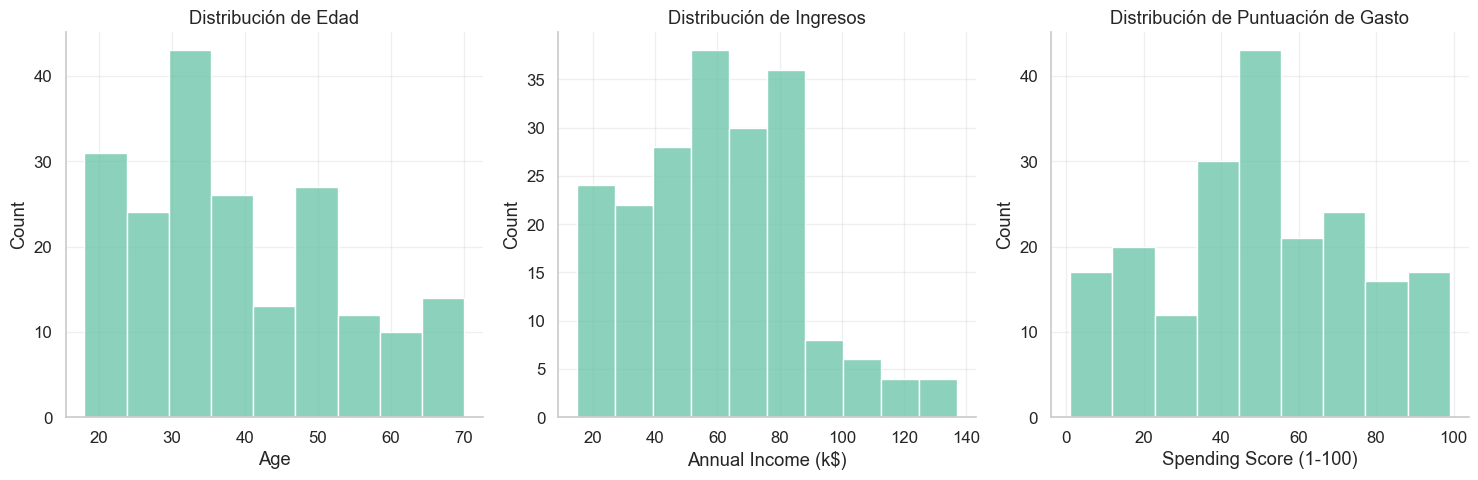

In [3]:
# Informaci√≥n b√°sica del dataset
print("Informaci√≥n del dataset:")
print(df.info())

print("\nEstad√≠sticas descriptivas:")
print(df.describe())

print("\nValores nulos:")
print(df.isnull().sum())

# Visualizaciones exploratorias
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data=df, x='Age')
plt.title('Distribuci√≥n de Edad')

plt.subplot(132)
sns.histplot(data=df, x='Annual Income (k$)')
plt.title('Distribuci√≥n de Ingresos')

plt.subplot(133)
sns.histplot(data=df, x='Spending Score (1-100)')
plt.title('Distribuci√≥n de Puntuaci√≥n de Gasto')
plt.tight_layout()
plt.show()

## 4. Preprocesamiento de Datos

In [4]:
# Convertir g√©nero a variable num√©rica
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecci√≥n de caracter√≠sticas
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Estandarizaci√≥n
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("‚úÖ Datos preprocesados exitosamente")

‚úÖ Datos preprocesados exitosamente


## 5. M√©todo del Codo

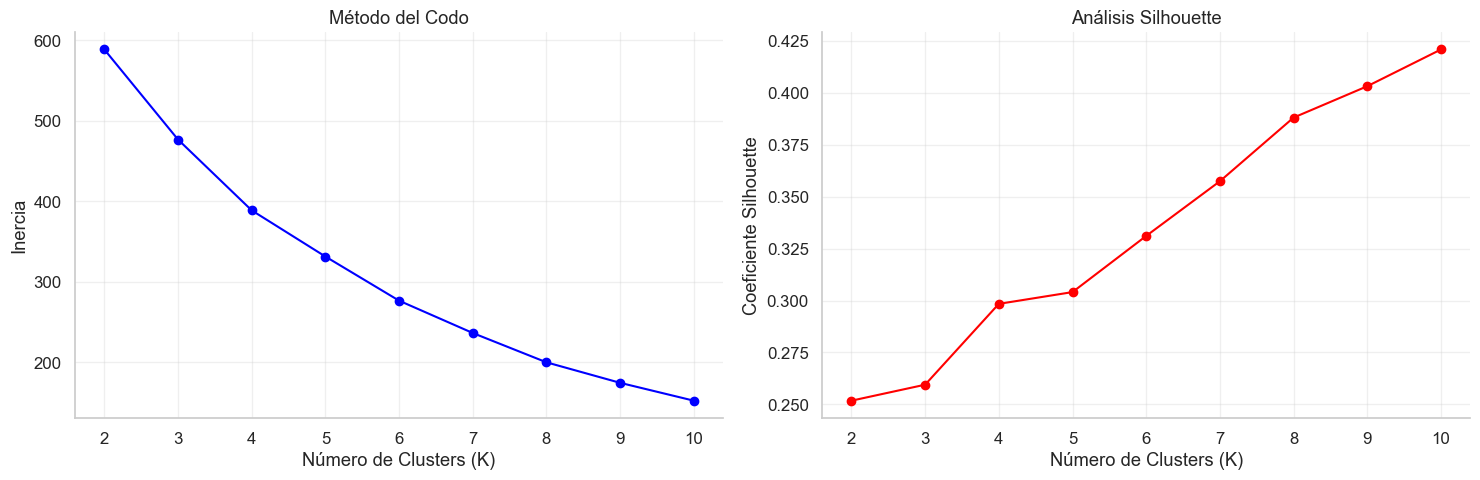

In [5]:
# C√°lculo de inercia y score silhouette para diferentes valores de k
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualizaci√≥n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('N√∫mero de Clusters (K)')
ax1.set_ylabel('Inercia')
ax1.set_title('M√©todo del Codo')

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('N√∫mero de Clusters (K)')
ax2.set_ylabel('Coeficiente Silhouette')
ax2.set_title('An√°lisis Silhouette')

plt.tight_layout()
plt.show()

## 6. Entrenamiento del Modelo

In [6]:
# Entrenamiento con K √≥ptimo
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
# Agregar etiquetas al DataFrame
df['Cluster'] = clusters
print(f"‚úÖ Modelo entrenado exitosamente con {k_optimo} clusters")

# Evaluaci√≥n del modelo
print(f"Silhouette Score: {silhouette_score(X_scaled, df['Cluster']):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_scaled, df['Cluster']):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, df['Cluster']):.3f}")

‚úÖ Modelo entrenado exitosamente con 5 clusters
Silhouette Score: 0.304
Calinski-Harabasz Index: 68.965
Davies-Bouldin Index: 1.167


## 7. Evaluaci√≥n y Visualizaci√≥n

M√©tricas de evaluaci√≥n:
Silhouette Score: 0.304
Calinski-Harabasz Score: 68.965
Davies-Bouldin Score: 1.167


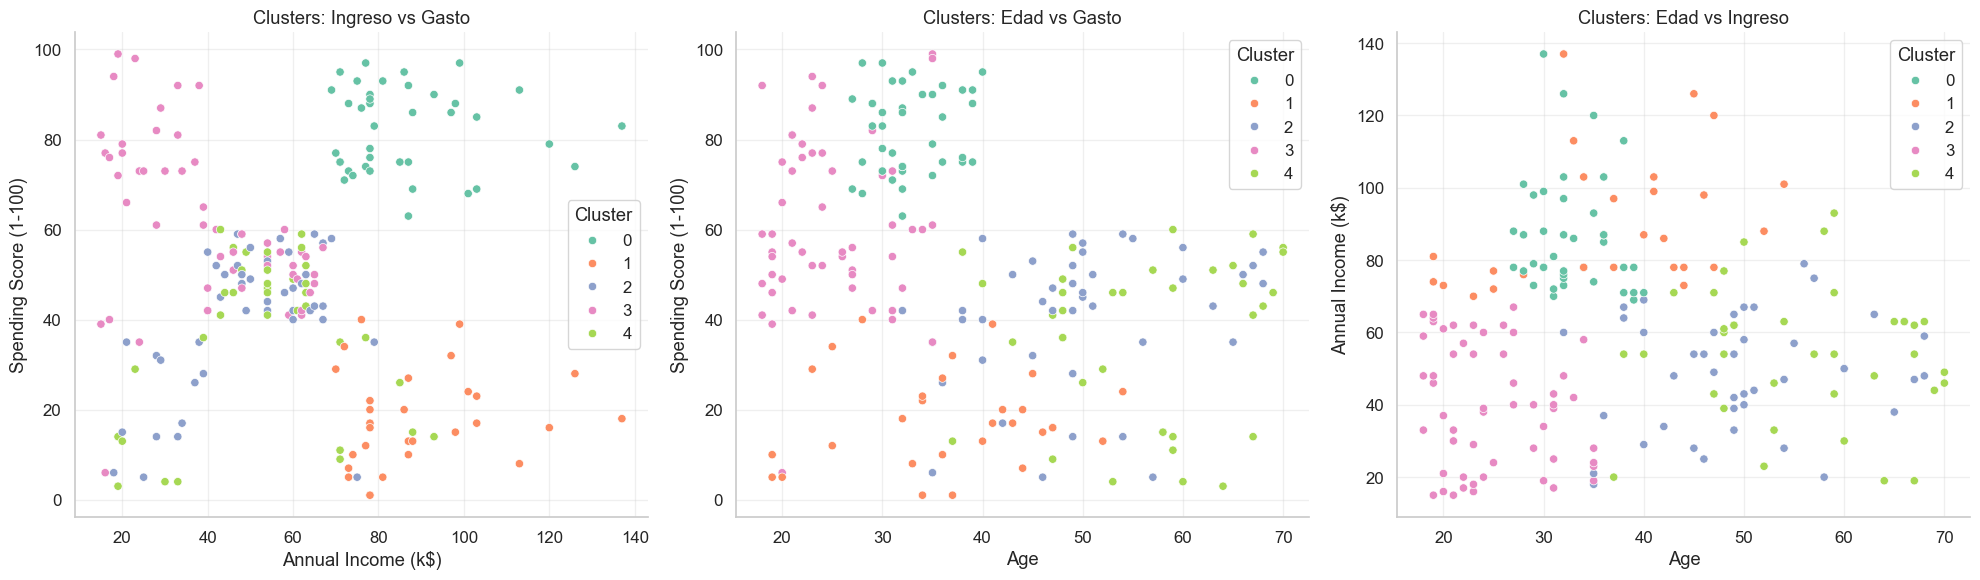


Estad√≠sticas por cluster:


Age       Annual Income (k$)        Spending Score (1-100)         \
          mean   std               mean    std                   mean    std   
Cluster                                                                        
0        32.69  3.73              86.54  16.31                  82.13   9.36   
1        36.48  9.68              89.52  17.42                  18.00  10.58   
2        49.81  9.47              49.23  15.60                  40.07  15.56   
3        24.91  5.35              39.72  16.98                  61.20  18.42   
4        55.71  9.60              53.69  18.71                  36.77  17.99   

        Gender  
          mean  
Cluster         
0         0.54  
1         0.55  
2         1.00  
3         0.59  
4         0.00

In [7]:
# M√©tricas de evaluaci√≥n
print("M√©tricas de evaluaci√≥n:")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, clusters):.3f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, clusters):.3f}")

# Visualizaci√≥n de clusters
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gr√°fico 1: Ingreso vs Gasto
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set2', ax=axes[0])
axes[0].set_title('Clusters: Ingreso vs Gasto')

# Gr√°fico 2: Edad vs Gasto
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set2', ax=axes[1])
axes[1].set_title('Clusters: Edad vs Gasto')

# Gr√°fico 3: Edad vs Ingreso
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', 
                hue='Cluster', palette='Set2', ax=axes[2])
axes[2].set_title('Clusters: Edad vs Ingreso')

plt.tight_layout()
plt.show()

# Estad√≠sticas por cluster
print("\nEstad√≠sticas por cluster:")
cluster_stats = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': 'mean'
}).round(2)

display(cluster_stats)

## üìå Interpretaci√≥n de Resultados ‚Äì K-means Clustering

Tras aplicar el algoritmo **K-means** con **5 clusters**, se evalu√≥ el modelo utilizando tres m√©tricas clave:

- **Silhouette Score**: `0.304`  
- **Calinski-Harabasz Score**: `68.965`  
- **Davies-Bouldin Score**: `1.167`

Estas m√©tricas indican una segmentaci√≥n funcional pero con potencial de mejora. El modelo logra separar a los clientes en grupos diferenciados, aunque no perfectamente definidos.

---

### üìä An√°lisis de los Clusters

Se identificaron **cinco grupos de clientes** con caracter√≠sticas bien diferenciadas, seg√∫n variables como edad, ingreso anual, puntaje de gasto y g√©nero:

#### üîπ Cluster 0
- Edad promedio: ~32 a√±os
- Ingreso alto: 86.54k
- Gasto alto: 82.13
- G√©nero equilibrado
> üü¢ *J√≥venes con alto poder adquisitivo y alto gasto. P√∫blico ideal para productos premium.*

#### üîπ Cluster 1
- Edad: ~36 a√±os
- Ingreso alto: 89.52k
- Gasto muy bajo: 18.0
> üü° *Clientes con buen ingreso pero bajo gasto. Requieren estrategias de incentivo.*

#### üîπ Cluster 2
- Edad: ~50 a√±os
- Ingreso medio: 49k
- Gasto moderado: 40
- Solo mujeres
> üü£ *Mujeres adultas con consumo medio. Enfocar fidelizaci√≥n y productos dirigidos.*

#### üîπ Cluster 3
- Edad: ~25 a√±os
- Ingreso bajo: 39.7k
- Gasto alto: 61.2
> üîµ *J√≥venes con bajo ingreso pero gasto elevado. Perfectos para promociones.*

#### üîπ Cluster 4
- Edad: ~55 a√±os
- Ingreso medio: 53.7k
- Gasto bajo: 36.8
- Solo hombres
> üî¥ *Hombres mayores con bajo gasto. Perfil conservador, enfocado en el ahorro.*

---

### ‚úÖ Conclusi√≥n

El modelo de K-means permite comprender el comportamiento de los clientes del mall desde una perspectiva cuantitativa. Esta segmentaci√≥n es √∫til para tomar decisiones de marketing orientadas a cada grupo, optimizando as√≠ las campa√±as y el enfoque comercial.